# Proyecto Análitica de Datos

**Nombres:**

Martín Burgos 00321436

Carolina Lanas 00320269

Edu Díaz  00320734

# Librerías a utilizar

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas profiling
from pandas_profiling import ProfileReport
# Para abrir el html
import webbrowser

import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.metrics import roc_curve, auc



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


C:\Users\martu\AppData\Local\Temp\ipykernel_5532\1026190805.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
c:\Users\martu\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


 # 1. EDA (Exploratory Data Analysis)

In [2]:
df0 = pd.read_csv('PublicHospitalDataset.csv', encoding='ISO-8859-1')

df0.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
# comprobación de valores ausentes
print(df0.isna().sum())
print("")
print(df0.columns[df0.isnull().any()])

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

Index(['Bmi'], dtype='object')


El porcentaje de pacientes que sufrieron de un accidente cerebrovascular es: 4.87%


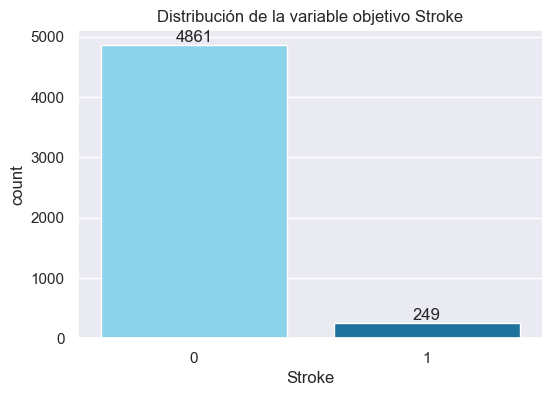

In [5]:
# Tamaño de la figura utilizando seaborn 
sns.set(rc={'figure.figsize':(6,4)}) 


# Título del gráfico utilizando matplotlib
plt.title('Distribución de la variable objetivo Stroke')

 
# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0']

# Countplot es un gráfico de barras que muestra la distribución de una variable categórica
sns.countplot(x='Stroke', data=df0, palette=colors) 

# Contamos los valores de la variable objetivo
counts = df0['Stroke'].value_counts() 
# Anotamos los valores en el gráfico
for i, count in enumerate(counts):
    plt.annotate(count, xy=(i, count), ha='center', va='bottom') # xy son las coordenadas donde se colocará el texto, ha es la alineación horizontal y va es la alineación vertical

# Se calcula el porcentaje de pacientes que sufrieron de un accidente cerebrovascular
porcentaje_stroke = round((len(df0[df0['Stroke']==1])/len(df0))*100, 2)
print(f"El porcentaje de pacientes que sufrieron de un accidente cerebrovascular es: {porcentaje_stroke}%")

Claramente se puede observar que la Base de datos esta desbalanceada y eso puede afectar el modelo de predicción.

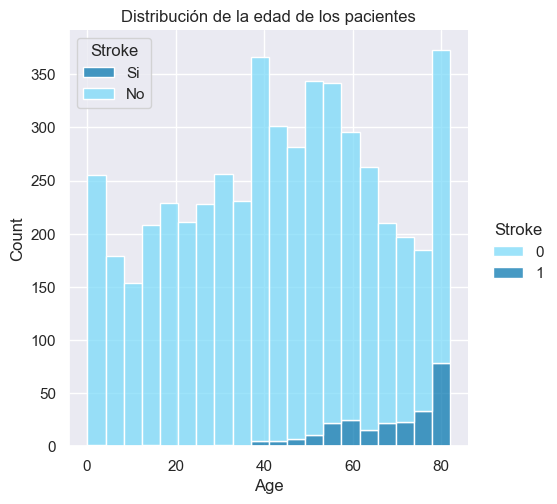

In [6]:
# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0']

# distplot es un histograma que muestra la distribución de una variable numérica
sns.displot(df0, x="Age", hue="Stroke", multiple = 'stack', palette= colors )  # multiple sirve para que se muestren las barras apiladas

plt.title('Distribución de la edad de los pacientes')

plt.legend(title="Stroke", labels=["Si", "No"])



In [7]:
# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0']

# Crear el gráfico con plotly express
fig = px.histogram(df0, x="Age", color="Stroke", nbins=30, barmode='overlay', color_discrete_sequence=colors, template='plotly_dark')

# Agregar título y leyenda
fig.update_layout(title="Distribución de la edad de los pacientes",
                  legend_title="Stroke",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  showlegend=True)

fig.show()

Se comprueba que conforme más edad tiene el paciente, más probabilidades tiene de tener un accidente cerebrovascular lo cual es lógico ya que la edad es un factor de riesgo.

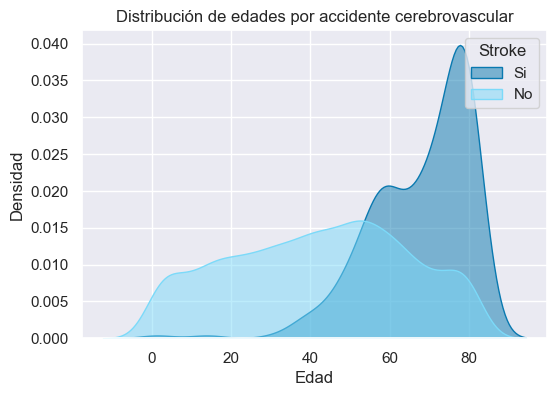

In [8]:
# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0'] 

# Se Crea un gráfico de densidad con Seaborn
sns.kdeplot(data=df0, x="Age", hue="Stroke", fill=True, alpha=.5, common_norm=False, common_grid= True, palette=colors)

# Añadir título y etiquetas de los ejes
plt.title("Distribución de edades por accidente cerebrovascular")
plt.xlabel("Edad")
plt.ylabel("Densidad")

# Añadir leyenda y cambiar nombres de las etiquetas
plt.legend(title="Stroke", labels=["Si", "No"])

# Mostrar el gráfico
plt.show()



Es evidente que el riesgo de sufrir un accidente cerebrovascular aumenta con la edad. Si observamos del rango de 60 a 80 años, la densidad de pacientes que sufrieron un accidente cerebrovascular es mayor que la de los que no lo sufrieron.

<AxesSubplot:xlabel='Avg_glucose_level', ylabel='Density'>

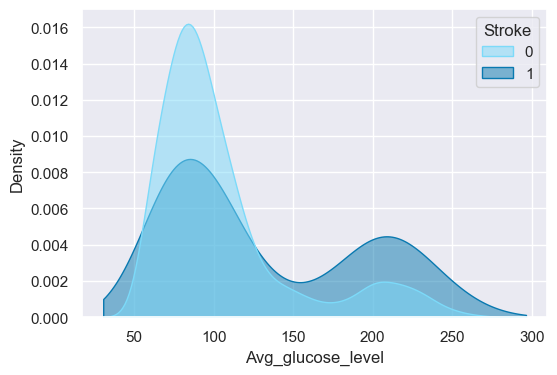

In [9]:

# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0'] 

# Se Crea un gráfico de densidad con Seaborn
sns.kdeplot(data = df0, x='Avg_glucose_level', hue='Stroke', fill=True,  alpha=0.5, common_norm=False, common_grid=True, palette = colors)

c:\Users\martu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 150 (\x96) missing from current font.



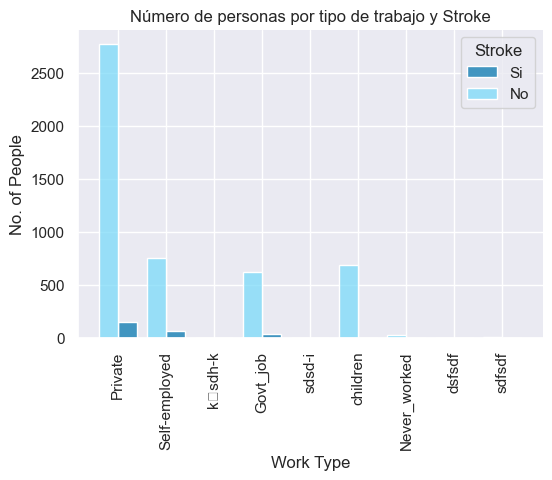

In [10]:

# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0'] 

sns.histplot(data=df0, x='Work', hue='Stroke',multiple='dodge', palette= colors, shrink=0.8)
sns.despine()

plt.xlabel('Work Type')
plt.ylabel('No. of People')
plt.title('Número de personas por tipo de trabajo y Stroke')
plt.legend(title='Stroke', labels=['Si', 'No'])
x = plt.xticks(rotation=90)

plt.show()


## Boxplots

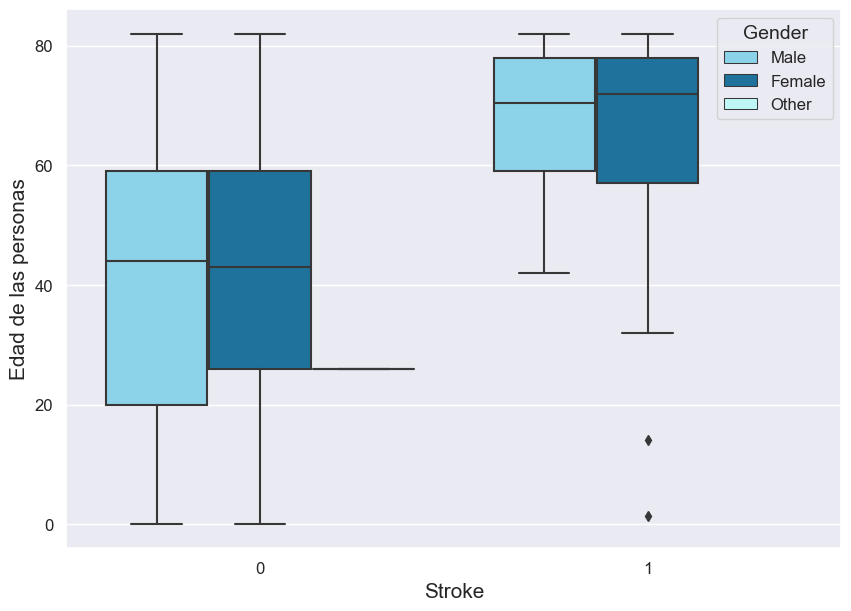

In [11]:

# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0', '#b6ffff']

fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x='Stroke', y='Age', hue='Gender', data= df0 , palette=colors)

ax.set_xlabel('Stroke', fontsize=15)
ax.set_ylabel('Edad de las personas', fontsize=15)
ax.tick_params(labelsize=12)
ax.legend(title='Gender', title_fontsize=14, fontsize=12)

plt.show()


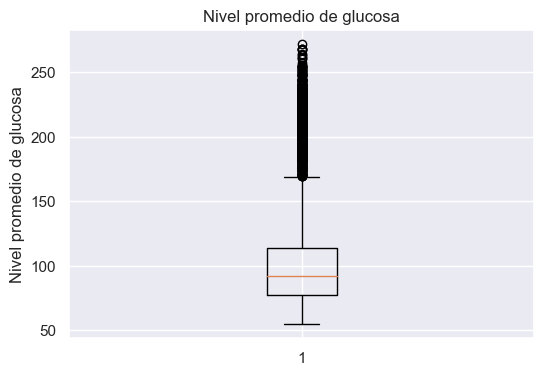

In [12]:
#Avg_Glucose level

x = df0['Avg_glucose_level']

plt.boxplot(x)
plt.ylabel('Nivel promedio de glucosa')
plt.title('Nivel promedio de glucosa')
# Mostramos el gráfico
plt.show()


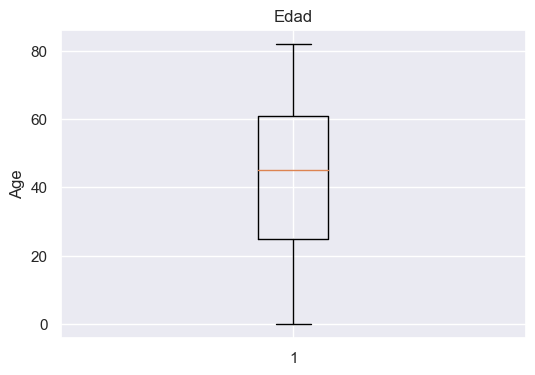

In [13]:
#Edad

x = df0['Age']

plt.boxplot(x)
plt.ylabel('Age')
plt.title('Edad')
# Mostramos el gráfico
plt.show()

Para realizar el EDA hemos decidido utilizar la librearía Pandas Profiling, la cual nos permite realizar un análisis exploratorio de los datos de forma rápida y sencilla. Para ello, hemos creado un peril de Pandas para el dataset utilizado en el proyecto.

In [14]:
# Se realiza un análisis exploratorio de los datos (EDA)

# Crear informe de exploración de datos
profile = ProfileReport(df0, title='Informe de exploración de datos Proyecto Primer Avance G7', explorative=True)

# Guardar informe en un archivo HTML
profile.to_file('Infome html-MBurgos_EDíaz_CLanas.html')

# Abrir el informe en el navegador web predeterminado
webbrowser.open_new_tab('Infome html-MBurgos_EDíaz_CLanas.html')



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\martu\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning:

Glyph 150 (\x96) missing from current font.



Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

# Limpieza de datos

In [15]:
# Correlación con respecto a la variable objetivo
df0.corr().Stroke.sort_values(ascending = False)


Stroke               1.000000
Age                  0.245257
Heart Disease        0.134914
Avg_glucose_level    0.131945
Hypertension         0.127904
Bmi                 -0.005730
Name: Stroke, dtype: float64

### Columna Work 

In [16]:
df0.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1


In [17]:
df0['Work'].unique()

array(['Private', 'Self-employed', 'k\x96sdh-k', 'Govt_job', 'sdsd-i',
       'children', 'Never_worked', 'dsfsdf', 'sdfsdf'], dtype=object)

In [18]:
# Vemos que hay palabras que carecen de coherencia y que como vimos en el EDA representan el 0.1% de los datos

filtro = df0['Work'].isin(['k\x96sdh-k','sdsd-i','dsfsdf', 'sdfsdf'])

df0 = df0.drop(df0[filtro].index)

print(df0['Work'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


### Columna Avg_glucose_level

In [19]:
# Se buscan valores atípicos que son mayores al Percentil 95 que es 216.29
atipicos = df0[df0['Avg_glucose_level'] > 216.29]

count = atipicos['Avg_glucose_level'].count()

count

255

In [20]:

# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0']

fig = px.box(df0,
             x='Stroke',
             y='Avg_glucose_level',
             color='Stroke',
             color_discrete_sequence=colors,  # Pasar la lista de colores personalizada
             labels={'Avg_glucose_level': 'Promedio de glucosa'},
             template='plotly_dark')

fig.update_layout(
    font_color='seashell',
    yaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
    xaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
)

# itera sobre cada una de las trazas de la figura, y en cada iteración se actualiza el nombre, la leyenda y el formato de información al pasar el cursor sobre la traza (hovertemplate).
newnames = {'0': 'No Stroke', '1': 'Stroke'}
fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(
                                          t.name, newnames[t.name])))

fig.show(height=800, width=800)



In [21]:
nivel_glucosa = df0[(df0['Avg_glucose_level'] > 167)
              & (df0['Stroke'] == 0)].index
nivel_glucosa

# Se eliminan los valores atípicos
df = df0.drop(nivel_glucosa,axis=0) 
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,No,children,Rural,103.08,18.6,Unknown,Female,13.0,0
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


### Columna BMI

In [22]:
print(df['Bmi'].isna().sum())

# Se calcula en porcentaje de valores ausentes
print(round(df['Bmi'].isna().sum() / df['Bmi'].count() * 100,2 ),'%')

150
3.41 %


In [23]:
fila = df.loc[df['Bmi'] == 40000]
fila

# Se elimina la fila con el valor atípico
df = df.drop(df[df['Bmi'] == 40000].index)

In [24]:
df.loc[df['Bmi'] == 40000]

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke


In [25]:
df_conbmi = df[df['Bmi'].notna()] # Se crea un nuevo dataframe con los valores no nulos
df_sinbmi = df[df['Bmi'].isna()] # Se crea un nuevo dataframe con los valores nulos



# Crear el modelo de regresión
model = LinearRegression()

model = model.fit(df_conbmi[['Avg_glucose_level', 'Age']], df_conbmi['Bmi'])

# Predecir los valores faltantes en la columna Bmi
predicted_bmi = model.predict(df_sinbmi[['Avg_glucose_level', 'Age']])

# Crear un dataframe con los valores predichos
df_pred_bmi = pd.DataFrame({'Bmi': predicted_bmi}, index=df_sinbmi.index)

# Actualizar la columna Bmi del dataframe original
df.update(df_pred_bmi)

# Verificar si hay valores nulos en la columna Bmi
print(df['Bmi'].isna().sum())


0


In [26]:

# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0']

fig = px.box(df,
             x='Stroke',
             y='Bmi',
             color='Stroke',
             color_discrete_sequence= colors,
             labels={'Bmi': 'Indice de Masa Corporal'},
             template='plotly_dark')

fig.update_layout(
    font_color='seashell',
    yaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
    xaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
)

newnames = {'0': 'No Stroke', '1': 'Stroke'}
fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(
                                          t.name, newnames[t.name])))


fig.show(height=800, width=1000)


In [27]:
Imc = df[(df['Bmi'] > 66.8)
              & (df['Stroke'] == 0)].index

Imc

# Se eliminan los valores atípicos
df = df.drop(Imc,axis=0) 
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,31.117935,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,No,children,Rural,103.08,18.600000,Unknown,Female,13.0,0
5105,1,0,Yes,Private,Urban,83.75,32.729542,never smoked,Female,80.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Male,51.0,0


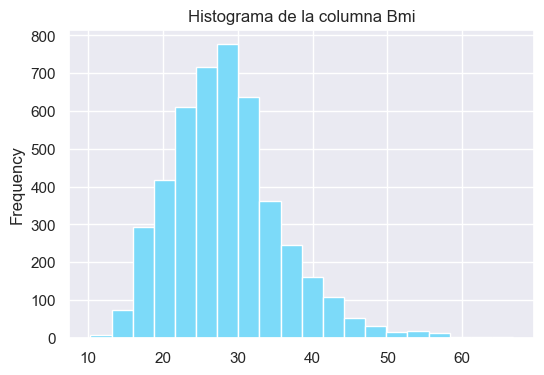

In [28]:
# Definir la lista de colores personalizada
colors = ['#7cdaf9', '#0979b0', '#b6ffff']

df['Bmi'].plot(kind='hist', bins=20, title='Histograma de la columna Bmi', color=colors[0])
plt.show()

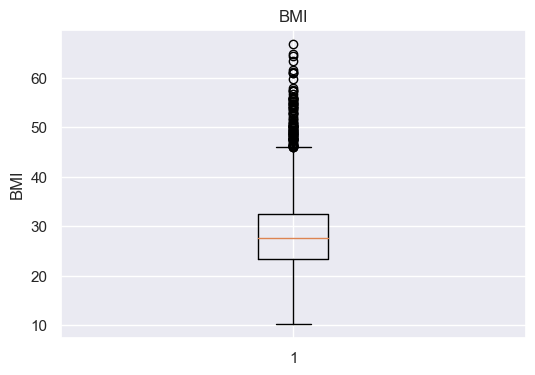

In [29]:
x = df['Bmi']

plt.boxplot(x)
plt.ylabel('BMI')
plt.title('BMI')
# Mostramos el gráfico
plt.show()


In [30]:
df['Bmi'].describe()

count    4545.000000
mean       28.390970
std         7.389715
min        10.300000
25%        23.400000
50%        27.700000
75%        32.400000
max        66.800000
Name: Bmi, dtype: float64

In [31]:
#Percentil 95 de la columna BMI
percentil95 = df['Bmi'].quantile(0.95)
percentil95

41.7

In [32]:
# Se buscan valores atípicos que son mayores al Percentil 95 que es 216.29
atipicos = df[df['Bmi'] > 41.7]

count = atipicos['Bmi'].count()

count

226

In [33]:
df.corr().Stroke.sort_values(ascending = False)

Stroke               1.000000
Avg_glucose_level    0.336602
Age                  0.279761
Heart Disease        0.167554
Hypertension         0.166880
Bmi                  0.073150
Name: Stroke, dtype: float64

In [34]:
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,31.117935,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,No,children,Rural,103.08,18.600000,Unknown,Female,13.0,0
5105,1,0,Yes,Private,Urban,83.75,32.729542,never smoked,Female,80.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Male,51.0,0


# Modelos de Machine Learning

In [35]:
# Es necesario convertir todos los strings en get_dummies para poder aplicar cualquier modelo de ML
# Convertir las columnas 'Married', 'Work' y 'Residence' en variables dummy

df = pd.get_dummies(df, columns=['Hypertension','Heart Disease','Married', 'Work', 'Residence','Smoking','Gender','Stroke'], drop_first= True)

In [36]:
df.columns

Index(['Avg_glucose_level', 'Bmi', 'Age', 'Hypertension_1', 'Heart Disease_1',
       'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male', 'Gender_Other', 'Stroke_1'],
      dtype='object')

In [37]:
df

,Avg_glucose_level,Bmi,Age,Hypertension_1,Heart Disease_1,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male,Gender_Other,Stroke_1
0,228.69,36.600000,67.0,0,1,1,0,1,0,0,1,1,0,0,1,0,1
1,202.21,31.117935,61.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,105.92,32.500000,80.0,0,1,1,0,1,0,0,0,0,1,0,1,0,1
3,171.23,34.400000,49.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,174.12,24.000000,79.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,103.08,18.600000,13.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5105,83.75,32.729542,80.0,1,0,1,0,1,0,0,1,0,1,0,0,0,0
5107,82.99,30.600000,35.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
5108,166.29,25.600000,51.0,0,0,1,0,1,0,0,0,1,0,0,1,0,0


# 2-3. Balanceo y División de la Base de datos

### Decisión de la división de la base de datos

In [38]:


X = df.drop("Stroke_1", axis=1)
y = df["Stroke_1"]

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento y prueba en un conjunto de entrenamiento y validación (60% y 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)

# Mostrar el tamaño de los conjuntos de datos resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de X_test: {X_test.shape}")


print("\n")

print(f"Porcentaje de X_train: {round(X_train.shape[0]/len(X)*100, 2)}%")
print(f"Porcentaje de X_val: {round(X_val.shape[0]/len(X)*100, 2)}%")
print(f"Porcentaje de X_test: {round(X_test.shape[0]/len(X)*100, 2)}%")



Tamaño de X_train: (2727, 16)
Tamaño de X_val: (909, 16)
Tamaño de X_test: (909, 16)


Porcentaje de X_train: 60.0%
Porcentaje de X_val: 20.0%
Porcentaje de X_test: 20.0%


### Técnicas de balanceo

Para comparar más adelante el rendimiento de las técnicas de balanceo; primero se realizará la predicción de la data sin balancear con el modelo de regresión logística. Después se balancearan los datos con ambas técnicas y se realizará la predicción con el modelo de regresión logística.

Para balancear los datos se va a utilizar:
1.  la técnica de SMOTE (Synthetic Minority Oversampling Technique), la cual consiste en generar muestras sintéticas de la clase minoritaria.

2. la técnica de ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning), la cual consiste en generar muestras sintéticas de la clase minoritaria. La cual funciona dando prioridad a las muestras que son más difíciles de clasificar.


#### Predicción con Regresión Logística sin balancear

In [39]:
# Separar variables predictoras y variable objetivo
X_logreg = df.drop('Stroke_1', axis=1)
y_logreg = df['Stroke_1']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_train_test_logreg, X_val_logreg, y_train_test_logreg, y_val_logreg = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42, stratify=y_logreg)
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_train_test_logreg, y_train_test_logreg, test_size=0.25, random_state=42, stratify=y_train_test_logreg)

# Definir el modelo
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Definir la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada
scores_logreg = cross_val_score(logreg_model, X_train_logreg, y_train_logreg, scoring="accuracy", cv=cv, n_jobs=-1)

# Imprimir la media y desviación estándar de los puntajes de validación cruzada
print("Logistic Regression Accuracy: %.3f (%.3f)" % (scores_logreg.mean(), scores_logreg.std()))

# Entrenar el modelo con los datos de entrenamiento y validación
logreg_model.fit(X_train_logreg, y_train_logreg)

# Predecir los datos de prueba
y_pred_logreg = logreg_model.predict(X_test_logreg)

# Imprimir el reporte de clasificación
print("Logistic Regression Report:\n", classification_report(y_test_logreg, y_pred_logreg))


Logistic Regression Accuracy: 0.958 (0.008)
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       860
           1       0.86      0.39      0.54        49

    accuracy                           0.96       909
   macro avg       0.91      0.69      0.76       909
weighted avg       0.96      0.96      0.96       909



#### Predicción con Regresión Logística con balanceo SMOTE

In [40]:
# Separar variables predictoras y variable objetivo
X_logreg_SM = df.drop('Stroke_1', axis=1)
y_logreg_SM = df['Stroke_1']

# Aplicar SMOTE a los datos
smote_lg = SMOTE(random_state=42)
X_logreg_SM_smote, y_logreg_SM_smote = smote_lg.fit_resample(X_logreg_SM, y_logreg_SM)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_logreg_SM_train, X_logreg_SM_test, y_logreg_SM_train, y_logreg_SM_test = train_test_split(X_logreg_SM_smote, y_logreg_SM_smote, test_size=0.2, random_state=42, stratify=y_logreg_SM_smote)
X_logreg_SM_train, X_logreg_SM_val, y_logreg_SM_train, y_logreg_SM_val = train_test_split(X_logreg_SM_train, y_logreg_SM_train, test_size=0.25, random_state=42, stratify=y_logreg_SM_train)

# Definir el modelo con SMOTE
logreg_SM = LogisticRegression(random_state=42, max_iter=1000)

# Definir la validación cruzada
cv_SM = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada
scores_smote = cross_val_score(logreg_SM, X_logreg_SM_train, y_logreg_SM_train, scoring="accuracy", cv=cv_SM, n_jobs=-1)

# Imprimir la media y desviación estándar de los puntajes de validación cruzada
print("Accuracy con SMOTE: %.3f (%.3f)" % (scores_smote.mean(), scores_smote.std()))

# Entrenar el modelo con los datos de entrenamiento y validación
logreg_SM.fit(X_logreg_SM_train, y_logreg_SM_train)

# Predecir los datos de prueba
y_logreg_SM_pred = logreg_SM.predict(X_logreg_SM_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación con SMOTE:")
print(classification_report(y_logreg_SM_test, y_logreg_SM_pred))


Accuracy con SMOTE: 0.884 (0.015)
Reporte de clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       860
           1       0.87      0.87      0.87       860

    accuracy                           0.87      1720
   macro avg       0.87      0.87      0.87      1720
weighted avg       0.87      0.87      0.87      1720



#### Predicción con Regresión Logística con balanceo ADASYN

In [41]:
# Separar variables predictoras y variable objetivo
X_ada = df.drop('Stroke_1', axis=1)
y_ada = df['Stroke_1']

# Aplicar ADASYN a los datos
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_ada, y_ada)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42, stratify=y_adasyn)
X_train_ada, X_val_ada, y_train_ada, y_val_ada = train_test_split(X_train_ada, y_train_ada, test_size=0.25, random_state=42, stratify=y_train_ada)

# Definir el modelo
logreg_ADA = LogisticRegression(random_state=42, max_iter=1000)

# Definir la validación cruzada
cv_ADA = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada en el conjunto de entrenamiento y validación
scores_ADA = cross_val_score(logreg_ADA, X_train_ada, y_train_ada, scoring="accuracy", cv=cv_ADA, n_jobs=-1)

# Imprimir la media y desviación estándar de los puntajes de validación cruzada
print("Accuracy con ADASYN: %.3f (%.3f)" % (scores_ADA.mean(), scores_ADA.std()))

# Entrenar el modelo con los datos de entrenamiento y validación
logreg_ADA.fit(X_train_ada, y_train_ada)

# Predecir los datos de prueba
y_pred_ada = logreg_ADA.predict(X_test_ada)

# Imprimir el reporte de clasificación
print("Reporte de clasificación con ADASYN:")
print(classification_report(y_test_ada, y_pred_ada))


Accuracy con ADASYN: 0.853 (0.019)
Reporte de clasificación con ADASYN:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       860
           1       0.84      0.86      0.85       857

    accuracy                           0.84      1717
   macro avg       0.84      0.84      0.84      1717
weighted avg       0.84      0.84      0.84      1717



# 4. Técnicas estadística comparativa de los balanceos

#### ROC Y AUC

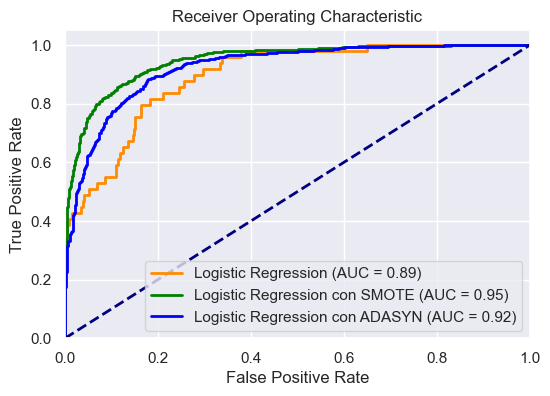

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelo de regresión logística sin balancear
y_score_logreg = logreg_model.predict_proba(X_test_logreg)[:,1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_logreg, y_score_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Modelo de regresión logística con SMOTE
y_score_smote = logreg_SM.predict_proba(X_logreg_SM_test)[:,1]
fpr_smote, tpr_smote, _ = roc_curve(y_logreg_SM_test, y_score_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Modelo de regresión logística con ADASYN
y_score_ada = logreg_ADA.predict_proba(X_test_ada)[:,1]
fpr_ada, tpr_ada, _ = roc_curve(y_test_ada, y_score_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Gráfica de la curva ROC
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label='Logistic Regression con SMOTE (AUC = %0.2f)' % roc_auc_smote)
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='Logistic Regression con ADASYN (AUC = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 5. Algoritmos de Machine Learning

## TPOT (Tree-based Pipeline Optimization Tool)

In [43]:

X = df.drop("Stroke_1", axis=1)
y = df["Stroke_1"]

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento y prueba en un conjunto de entrenamiento y validación (60% y 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)







# Mostrar el tamaño de los conjuntos de datos resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de X_test: {X_test.shape}")


print("\n")

print(f"Porcentaje de X_train: {round(X_train.shape[0]/len(X)*100, 2)}%")
print(f"Porcentaje de X_val: {round(X_val.shape[0]/len(X)*100, 2)}%")
print(f"Porcentaje de X_test: {round(X_test.shape[0]/len(X)*100, 2)}%")


# Crear una instancia de TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Ajustar TPOT a los datos de entrenamiento y validación
tpot.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por TPOT
best_pipeline = tpot.fitted_pipeline_

# Evaluar el mejor modelo en los datos de prueba
score = best_pipeline.score(X_test, y_test)
print(f"Puntaje del mejor modelo: {score}")


# Obtener los 5 mejores modelos encontrados por TPOT
top_models = tpot.evaluated_individuals_.items()
top_models = sorted(top_models, key=lambda x: x[1]['internal_cv_score'], reverse=True)[:5]

# Crear una tabla de los 5 mejores modelos
print("Los 5 mejores modelos encontrados por TPOT:")
print("-" * 45)
print("Modelo".ljust(10), "Precisión")
print("-" * 45)
for model, score in top_models:
    print(model.ljust(10), round(score['internal_cv_score'], 4))



Tamaño de X_train: (2727, 16)
Tamaño de X_val: (909, 16)
Tamaño de X_test: (909, 16)


Porcentaje de X_train: 60.0%
Porcentaje de X_val: 20.0%
Porcentaje de X_test: 20.0%


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9622314077359949


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=18, min_samples_split=20, n_estimators=100)
Puntaje del mejor modelo: 0.966996699669967
Los 5 mejores modelos encontrados por TPOT:
---------------------------------------------
Modelo     Precisión
---------------------------------------------
RandomForestClassifier(MinMaxScaler(input_matrix), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100) 0.9622
RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, Ran

Utilizando TPOT nos dimos cuenta que el mejor modelo para este dataset es el Extra Trees Classifier, el cual nos da un accuracy de 0.9625.

#### Ensamble: Extra Trees Classifier con SMOTE

In [45]:
# Separar variables predictoras y variable objetivo
X = df.drop('Stroke_1', axis=1)
y = df['Stroke_1']

# Aplicar SMOTE a los datos
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_train_test, X_test, y_train_test, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=42, stratify=y_train_test)

# Definir el modelo
ExtraTC_SM= ExtraTreesClassifier(n_estimators=500, random_state=42)

# Definir la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(ExtraTC_SM, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)

# Imprimir la media y desviación estándar de los puntajes de validación cruzada
print("Accuracy: %.3f (%.3f)" % (scores.mean(), scores.std()))

# Entrenar el modelo con los datos de entrenamiento y validación
ExtraTC_SM.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = ExtraTC_SM.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Se imprime si los pacientes tendrán o no un ataque cerebrovascular
for i in range(len(y_test)):
    print(f"El paciente {i+1} {'tendrá' if y_pred[i] == 1 else 'no tendrá'} un ataque cerebrovascular.")



Accuracy: 0.953 (0.006)
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       860
           1       0.93      0.96      0.94       860

    accuracy                           0.94      1720
   macro avg       0.94      0.94      0.94      1720
weighted avg       0.94      0.94      0.94      1720

El paciente 1 tendrá un ataque cerebrovascular.
El paciente 2 tendrá un ataque cerebrovascular.
El paciente 3 tendrá un ataque cerebrovascular.
El paciente 4 no tendrá un ataque cerebrovascular.
El paciente 5 no tendrá un ataque cerebrovascular.
El paciente 6 no tendrá un ataque cerebrovascular.
El paciente 7 no tendrá un ataque cerebrovascular.
El paciente 8 no tendrá un ataque cerebrovascular.
El paciente 9 tendrá un ataque cerebrovascular.
El paciente 10 no tendrá un ataque cerebrovascular.
El paciente 11 no tendrá un ataque cerebrovascular.
El paciente 12 tendrá un ataque cerebrovascular.
El paciente 13 no tendrá un ataque cerebrovascula

#### Segundo Algoritmo: Gradient Boosting Classifier

In [46]:
# Separar variables predictoras y variable objetivo
X = df.drop('Stroke_1', axis=1)
y = df['Stroke_1']

# Aplicar SMOTE a los datos
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Definir el modelo
GB_SM = GradientBoostingClassifier(n_estimators=500, random_state=42)

# Definir la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(GB_SM, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)

# Imprimir la media y desviación estándar de los puntajes de validación cruzada
print("Accuracy: %.3f (%.3f)" % (scores.mean(), scores.std()))

# Entrenar el modelo con los datos de entrenamiento y validación
GB_SM.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = GB_SM.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


# Se imprime si los pacientes tendrán o no un ataque cerebrovascular
for i in range(len(y_test)):
    print(f"El paciente {i+1} {'tendrá' if y_pred[i] == 1 else 'no tendrá'} un ataque cerebrovascular.")

print()




Accuracy: 0.950 (0.008)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       860
           1       0.94      0.95      0.94       860

    accuracy                           0.94      1720
   macro avg       0.94      0.94      0.94      1720
weighted avg       0.94      0.94      0.94      1720

El paciente 1 tendrá un ataque cerebrovascular.
El paciente 2 tendrá un ataque cerebrovascular.
El paciente 3 tendrá un ataque cerebrovascular.
El paciente 4 no tendrá un ataque cerebrovascular.
El paciente 5 no tendrá un ataque cerebrovascular.
El paciente 6 no tendrá un ataque cerebrovascular.
El paciente 7 no tendrá un ataque cerebrovascular.
El paciente 8 no tendrá un ataque cerebrovascular.
El paciente 9 tendrá un ataque cerebrovascular.
El paciente 10 no tendrá un ataque cerebrovascular.
El paciente 11 no tendrá un ataque cerebrovascular.
El paciente 12 tendrá un ataque cerebrovascular.
El paciente 13 no tendrá un ataque cerebrovascula

# **Avance 2**

# TPOT con SMOTE para Optimización de Hiperparámetros

In [67]:
X = df.drop("Stroke_1", axis=1)
y = df["Stroke_1"]



# Aplicar SMOTE a los datos
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X_train_test, X_test, y_train_test, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=42, stratify=y_train_test)




# Mostrar el tamaño de los conjuntos de datos resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de X_test: {X_test.shape}")


print("\n")

print(f"Porcentaje de X_train: {round(X_train.shape[0]/len(X_smote)*100, 2)}%")
print(f"Porcentaje de X_val: {round(X_val.shape[0]/len(X_smote)*100, 2)}%")
print(f"Porcentaje de X_test: {round(X_test.shape[0]/len(X_smote)*100, 2)}%")


# Crear una instancia de TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Ajustar TPOT a los datos de entrenamiento y validación
tpot.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por TPOT
best_pipeline = tpot.fitted_pipeline_

# Evaluar el mejor modelo en los datos de prueba
score = best_pipeline.score(X_test, y_test)
print(f"Puntaje del mejor modelo: {score}")


# Obtener los 5 mejores modelos encontrados por TPOT
top_models = tpot.evaluated_individuals_.items()
top_models = sorted(top_models, key=lambda x: x[1]['internal_cv_score'], reverse=True)[:5]

# Crear una tabla de los 5 mejores modelos
print("Los 5 mejores modelos encontrados por TPOT:")
print("-" * 45)
print("Modelo".ljust(10), "Precisión")
print("-" * 45)
for model, score in top_models:
    print(model.ljust(10), round(score['internal_cv_score'], 4))

Tamaño de X_train: (5500, 16)
Tamaño de X_val: (1376, 16)
Tamaño de X_test: (1720, 16)


Porcentaje de X_train: 63.98%
Porcentaje de X_val: 16.01%
Porcentaje de X_test: 20.01%


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9545454545454545

Generation 2 - Current best internal CV score: 0.9589090909090909

Generation 3 - Current best internal CV score: 0.9596363636363637

Generation 4 - Current best internal CV score: 0.9596363636363637

Generation 5 - Current best internal CV score: 0.9598181818181818

Best pipeline: XGBClassifier(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=8, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0), learning_rate=0.01, max_depth=3, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Puntaje del mejor modelo: 0.9476744186046512
Los 5 mejores modelos encontrados por TPOT:
---------------------------------------------
Modelo     Precisión
---------------------------------------------
XGBClassifier(XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=8, XGBClassifier__min_child_weight=1, XGBClassifier__n_estimators=100,

# 5.3 Algoritmos con método de optimización

## RandomForestClassifier con algoritmo de Optimización de Hiperparámetros en base a TPOT

 RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=3, RandomForestClassifier__n_estimators=100


In [63]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Definir las variables independientes (X) y la variable dependiente (y)
X_rfc = df.drop('Stroke_1', axis=1)
y_rfc = df['Stroke_1']

# Aplicar SMOTE para balancear la clase minoritaria
sm = SMOTE(random_state=42)
X_rfc, y_rfc = sm.fit_resample(X_rfc, y_rfc)

# Escalar las características
scaler_rfc = RobustScaler()
X_scaled_rfc = scaler_rfc.fit_transform(X_rfc)

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_test_rfc, X_test_rfc, y_train_test_rfc, y_test_rfc = train_test_split(X_scaled_rfc, y_rfc, test_size=0.2, random_state=42, stratify=y_rfc)

# Dividir el conjunto de entrenamiento y prueba en un conjunto de entrenamiento y validación (60% y 20%)
X_train_rfc, X_val_rfc, y_train_rfc, y_val_rfc = train_test_split(X_train_test_rfc, y_train_test_rfc, test_size=0.25, random_state=42, stratify=y_train_test_rfc)

# Crear el modelo de RandomForestClassifier con los hiperparámetros encontrados por TPOT
model_rfc = RandomForestClassifier(bootstrap=False, criterion='gini', max_features=0.55, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_rfc.fit(X_train_rfc, y_train_rfc)

# Realizar predicciones en los datos de validación
y_val_rfc_pred = model_rfc.predict(X_val_rfc)

# Calcular la precisión del modelo en los datos de validación
val_accuracy_rfc = accuracy_score(y_val_rfc, y_val_rfc_pred)

print(f'Exactitud del modelo en el conjunto de validación: {val_accuracy_rfc:.4f}')

# Calcular la precisión del modelo en los datos de prueba
score_rfc = model_rfc.score(X_test_rfc, y_test_rfc)

print(f'Exactitud del modelo en el conjunto de prueba: {score_rfc:.4f}')


Exactitud del modelo en el conjunto de validación: 0.9639
Exactitud del modelo en el conjunto de prueba: 0.9541


## XGBClassifier con algoritmo de Optimización de Hiperparámetros en base a TPOT

XGBClassifier(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=8, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0), learning_rate=0.01, max_depth=3, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Puntaje del mejor modelo: 0.9476744186046512

In [48]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definir las variables independientes (X) y la variable dependiente (y)
X = df.drop('Stroke_1', axis=1)
y = df['Stroke_1']

# Aplicar SMOTE a la base de datos
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento y validación en un conjunto de entrenamiento y validación (60% y 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Crear el modelo XGBClassifier con los hiperparámetros dados
model_xgb = XGBClassifier(learning_rate=0.5, max_depth=8, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)

# Entrenar el modelo con los datos de entrenamiento
model_xgb.fit(X_train, y_train)

# Realizar predicciones en los datos de validación
y_val_pred = model_xgb.predict(X_val)

# Calcular la precisión del modelo en los datos de validación
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Exactitud del modelo en el conjunto de validación: {val_accuracy:.4f}')

# Realizar predicciones en los datos de prueba
y_test_pred = model_xgb.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Exactitud del modelo en el conjunto de prueba: {test_accuracy:.4f}')


Exactitud del modelo en el conjunto de validación: 0.9604
Exactitud del modelo en el conjunto de prueba: 0.9529


# 5.4 Hiperparametros justificados con Papers Académicos

### RandomForestClassifier Hiperparámetros de acuerdo a Paper Académico

Exactitud del modelo en el conjunto de validación: 0.9659
Exactitud del modelo en el conjunto de prueba: 0.9670
Exactitud del modelo en el conjunto de entrenamiento: 0.9626
Exactitud del modelo en el conjunto de validación: 0.9659
Exactitud del modelo en el conjunto de prueba: 0.9670
Sensibilidad del modelo en el conjunto de prueba: 0.3878
Especificidad del modelo en el conjunto de prueba: 1.0000
Precisión del modelo en el conjunto de prueba: 1.0000
Valor de AUC-ROC del modelo en el conjunto de prueba: 0.8660


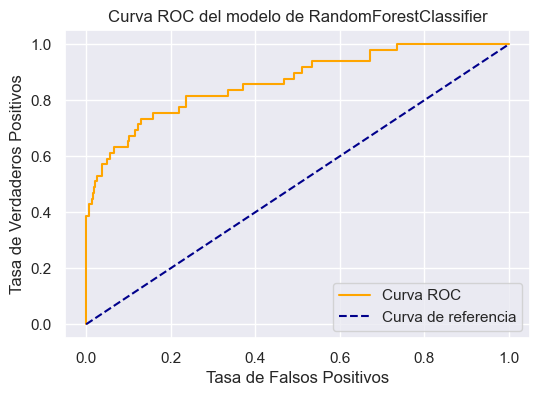

In [68]:
from sklearn.preprocessing import MinMaxScaler
# Definir las variables independientes (X) y la variable dependiente (y)
X_rfcp = df.drop('Stroke_1', axis=1)
y_rfcp = df['Stroke_1']

# Escalar las características
scaler_rfcp = MinMaxScaler()
X_scaled_rfcp = scaler_rfcp.fit_transform(X_rfcp)

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_test_rfcp, X_test_rfcp, y_train_test_rfcp, y_test_rfcp = train_test_split(X_scaled_rfcp, y_rfcp, test_size=0.2, random_state=42, stratify=y_rfcp)

# Dividir el conjunto de entrenamiento y prueba en un conjunto de entrenamiento y validación (60% y 20%)
X_train_rfcp, X_val_rfcp, y_train_rfcp, y_val_rfcp = train_test_split(X_train_test_rfcp, y_train_test_rfcp, test_size=0.25, random_state=42, stratify=y_train_test_rfcp)

# Crear el modelo de RandomForestClassifier con los hiperparámetros encontrados por TPOT
model_rfcp = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features= 'log2' , min_samples_leaf=8, min_samples_split=10, n_estimators=1000)

# Entrenar el modelo con los datos de entrenamiento
model_rfcp.fit(X_train_rfcp, y_train_rfcp)

# Realizar predicciones en los datos de validación
y_val_rfcp_pred = model_rfcp.predict(X_val_rfcp)

# Calcular la precisión del modelo en los datos de validación
val_accuracy_rfcp = accuracy_score(y_val_rfcp, y_val_rfcp_pred)

print(f'Exactitud del modelo en el conjunto de validación: {val_accuracy_rfcp:.4f}')

# Calcular la precisión del modelo en los datos de prueba
score_rfcp = model_rfcp.score(X_test_rfcp, y_test_rfcp)

print(f'Exactitud del modelo en el conjunto de prueba: {score_rfcp:.4f}')




from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

# Realizar predicciones en los datos de entrenamiento, validación y prueba
y_train_rfcp_pred = model_rfcp.predict(X_train_rfcp)
y_val_rfcp_pred = model_rfcp.predict(X_val_rfcp)
y_test_rfcp_pred = model_rfcp.predict(X_test_rfcp)

# Calcular la exactitud del modelo en los datos de entrenamiento, validación y prueba
train_accuracy_rfcp = accuracy_score(y_train_rfcp, y_train_rfcp_pred)
val_accuracy_rfcp = accuracy_score(y_val_rfcp, y_val_rfcp_pred)
test_accuracy_rfcp = accuracy_score(y_test_rfcp, y_test_rfcp_pred)

print(f'Exactitud del modelo en el conjunto de entrenamiento: {train_accuracy_rfcp:.4f}')
print(f'Exactitud del modelo en el conjunto de validación: {val_accuracy_rfcp:.4f}')
print(f'Exactitud del modelo en el conjunto de prueba: {test_accuracy_rfcp:.4f}')

# Calcular la matriz de confusión en el conjunto de prueba
confusion_rfcp = confusion_matrix(y_test_rfcp, y_test_rfcp_pred)

# Extraer los valores de la matriz de confusión
tn_rfcp, fp_rfcp, fn_rfcp, tp_rfcp = confusion_rfcp.ravel()

# Calcular la sensibilidad, especificidad y precisión del modelo en el conjunto de prueba
sensitivity_rfcp = tp_rfcp / (tp_rfcp + fn_rfcp)
specificity_rfcp = tn_rfcp / (tn_rfcp + fp_rfcp)
precision_rfcp = precision_score(y_test_rfcp, y_test_rfcp_pred)

print(f'Sensibilidad del modelo en el conjunto de prueba: {sensitivity_rfcp:.4f}')
print(f'Especificidad del modelo en el conjunto de prueba: {specificity_rfcp:.4f}')
print(f'Precisión del modelo en el conjunto de prueba: {precision_rfcp:.4f}')

# Calcular el valor de AUC-ROC en el conjunto de prueba
y_test_rfcp_prob = model_rfcp.predict_proba(X_test_rfcp)[:, 1]
auc_roc_rfcp = roc_auc_score(y_test_rfcp, y_test_rfcp_prob)

print(f'Valor de AUC-ROC del modelo en el conjunto de prueba: {auc_roc_rfcp:.4f}')

# Graficar la curva ROC en el conjunto de prueba
fpr_rfcp, tpr_rfcp, thresholds_rfcp = roc_curve(y_test_rfcp, y_test_rfcp_prob)

plt.plot(fpr_rfcp, tpr_rfcp, color='orange', label='Curva ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Curva de referencia')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo de RandomForestClassifier')
plt.legend()
plt.show()




### XGBClassifier Hiperparámetros de acuerdo a Paper Académico

Exactitud del modelo en el conjunto de prueba: 0.9626
Sensibilidad del modelo en el conjunto de prueba: 0.4082
Especificidad del modelo en el conjunto de prueba: 0.9942
Precisión del modelo en el conjunto de prueba: 0.8000
Exactitud del modelo en el conjunto de validación: 0.9648
Exactitud del modelo en el conjunto de prueba: 0.9626


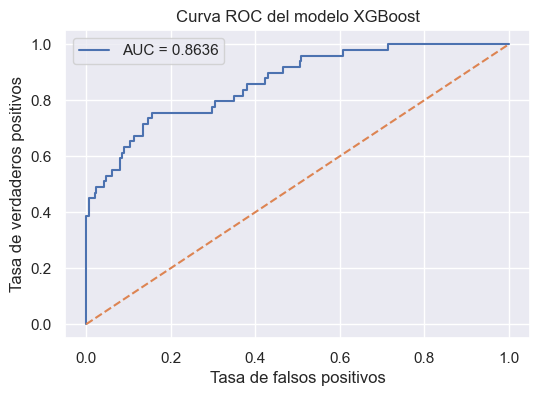

In [70]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Definir las variables independientes (X) y la variable dependiente (y)
X_xgbp = df.drop('Stroke_1', axis=1)
y_xgbp = df['Stroke_1']

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_val_xgbp, X_test_xgbp, y_train_val_xgbp, y_test_xgbp = train_test_split(X_xgbp, y_xgbp, test_size=0.2, random_state=42, stratify=y_xgbp)

# Dividir el conjunto de entrenamiento y validación en un conjunto de entrenamiento y validación (60% y 20%)
X_train_xgbp, X_val_xgbp, y_train_xgbp, y_val_xgbp = train_test_split(X_train_val_xgbp, y_train_val_xgbp, test_size=0.25, random_state=42, stratify=y_train_val_xgbp)

# Crear el modelo XGBClassifier con los hiperparámetros dados
model_xgbp = XGBClassifier(learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, n_jobs=1, subsample=0.5, verbosity=0)

# Entrenar el modelo con los datos de entrenamiento
model_xgbp.fit(X_train_xgbp, y_train_xgbp)

# Realizar predicciones en los datos de validación
y_val_pred_xgbp = model_xgbp.predict(X_val_xgbp)



from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Realizar predicciones en los datos de prueba
y_test_pred_xgbp = model_xgbp.predict(X_test_xgbp)

# Calcular la precisión del modelo en los datos de prueba
test_accuracy_xgbp = accuracy_score(y_test_xgbp, y_test_pred_xgbp)

print(f'Exactitud del modelo en el conjunto de prueba: {test_accuracy_xgbp:.4f}')

# Calcular la sensibilidad del modelo en los datos de prueba
test_sensitivity_xgbp = recall_score(y_test_xgbp, y_test_pred_xgbp)

print(f'Sensibilidad del modelo en el conjunto de prueba: {test_sensitivity_xgbp:.4f}')

# Calcular la especificidad del modelo en los datos de prueba
tn, fp, fn, tp = confusion_matrix(y_test_xgbp, y_test_pred_xgbp).ravel()
test_specificity_xgbp = tn / (tn + fp)

print(f'Especificidad del modelo en el conjunto de prueba: {test_specificity_xgbp:.4f}')

# Calcular la precisión del modelo en los datos de prueba
test_precision_xgbp = precision_score(y_test_xgbp, y_test_pred_xgbp)

print(f'Precisión del modelo en el conjunto de prueba: {test_precision_xgbp:.4f}')

# Obtener la probabilidad de pertenencia a la clase positiva para los datos de prueba
y_test_prob_xgbp = model_xgbp.predict_proba(X_test_xgbp)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales de clasificación para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_xgbp, y_test_prob_xgbp)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test_xgbp, y_test_prob_xgbp)

# Calcular la precisión del modelo en los datos de validación
val_accuracy_xgbp = accuracy_score(y_val_xgbp, y_val_pred_xgbp)

print(f'Exactitud del modelo en el conjunto de validación: {val_accuracy_xgbp:.4f}')

# Realizar predicciones en los datos de prueba
y_test_pred_xgbp = model_xgbp.predict(X_test_xgbp)

# Calcular la precisión del modelo en los datos de prueba
test_accuracy_xgbp = accuracy_score(y_test_xgbp, y_test_pred_xgbp)

print(f'Exactitud del modelo en el conjunto de prueba: {test_accuracy_xgbp:.4f}')






from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener la probabilidad de pertenencia a la clase positiva para los datos de prueba
y_test_prob_xgbp = model_xgbp.predict_proba(X_test_xgbp)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales de clasificación para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_xgbp, y_test_prob_xgbp)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test_xgbp, y_test_prob_xgbp)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC del modelo XGBoost')
plt.legend()
plt.show()


# 6.1 Matriz de confusión, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC para cada algoritmo en el set de entrenamiento, validación y prueba

### Modelo 1 ExtraTreesClassifier con SMOTE

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



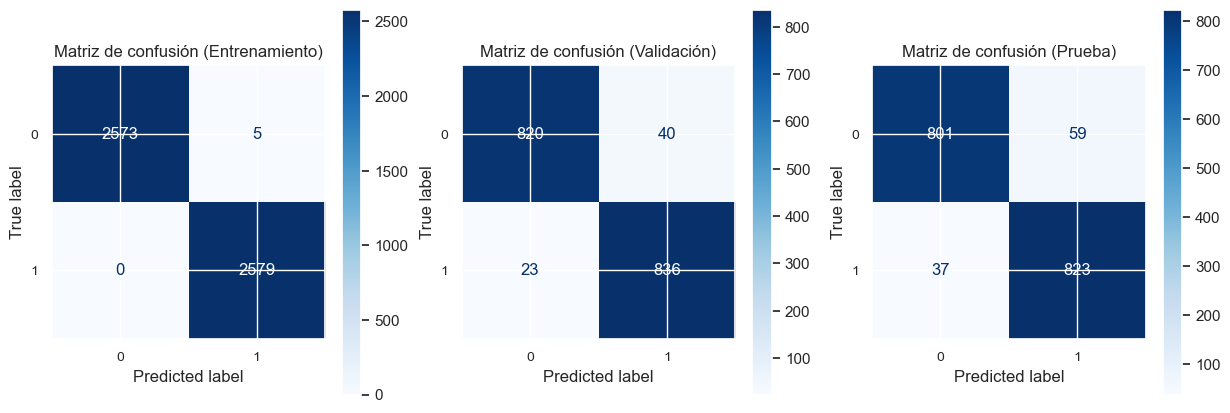

Set de entrenamiento:
Accuracy: 0.9990304440566221
Precision: 0.9980650154798761
Recall: 1.0
Especificidad: 0.9980605120248255
F1-score: 0.9990315707921751
AUC-ROC: 1.0

Set de validación:
Accuracy: 0.9633507853403142
Precision: 0.954337899543379
Recall: 0.9732246798603027
Especificidad: 0.9534883720930233
F1-score: 0.9636887608069165
AUC-ROC: 0.9942523756666758

Set de prueba:
Accuracy: 0.9441860465116279
Precision: 0.9331065759637188
Recall: 0.9569767441860465
Especificidad: 0.9313953488372093
F1-score: 0.9448909299655569
AUC-ROC: 0.9897789345592213


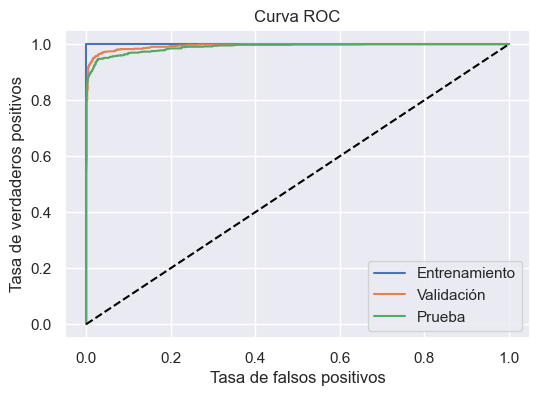

In [53]:
# Modelo 1 ExtraTreesClassifier con SMOTE
#Set de entrenamiento
y_train_test = ExtraTC_SM.predict(X_train)
conf_mat_train1 = confusion_matrix(y_train, y_train_test)
acc_train1 = accuracy_score(y_train, y_train_test)
prec_train1 = precision_score(y_train, y_train_test)
rec_train1 = recall_score(y_train, y_train_test)
f1_train1 = f1_score(y_train, y_train_test)
auc_train1 = roc_auc_score(y_train, ExtraTC_SM.predict_proba(X_train)[:, 1])
fpr_train1, tpr_train1, thresholds_train1 = roc_curve(y_train, ExtraTC_SM.predict_proba(X_train)[:, 1])

#Set de validación
y_val_pred1 = ExtraTC_SM.predict(X_val)
conf_mat_val1 = confusion_matrix(y_val, y_val_pred1)
acc_val1 = accuracy_score(y_val, y_val_pred1)
prec_val1 = precision_score(y_val, y_val_pred1)
rec_val1 = recall_score(y_val, y_val_pred1)
f1_val1 = f1_score(y_val, y_val_pred1)
auc_val1 = roc_auc_score(y_val, ExtraTC_SM.predict_proba(X_val)[:, 1])
fpr_val1, tpr_val1, thresholds_val1 = roc_curve(y_val, ExtraTC_SM.predict_proba(X_val)[:, 1])

#Set de prueba
y_test_pred1 = ExtraTC_SM.predict(X_test)
conf_mat_test1 = confusion_matrix(y_test, y_test_pred1)
acc_test1 = accuracy_score(y_test, y_test_pred1)
prec_test1 = precision_score(y_test, y_test_pred1)
rec_test1 = recall_score(y_test, y_test_pred1)
f1_test1 = f1_score(y_test, y_test_pred1)
auc_test1 = roc_auc_score(y_test, ExtraTC_SM.predict_proba(X_test)[:, 1])
fpr_test1, tpr_test1, thresholds_test1 = roc_curve(y_test, ExtraTC_SM.predict_proba(X_test)[:, 1])




# Crear los objetos plot_confusion_matrix
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_confusion_matrix(ExtraTC_SM, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])  #ax[0] es para 
plot_confusion_matrix(ExtraTC_SM, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plot_confusion_matrix(ExtraTC_SM, X_test, y_test, cmap=plt.cm.Blues, ax=ax[2])

# Personalizar los parámetros del gráfico
for i, label in enumerate(['Entrenamiento', 'Validación', 'Prueba']):
    ax[i].set_title(f'Matriz de confusión ({label})')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].tick_params(axis='both', which='major', labelsize=10)

# Mostrar el gráfico
plt.show()

espec_train1 = conf_mat_train1[0, 0] / (conf_mat_train1[0, 0] + conf_mat_train1[0, 1])
espec_val1 = conf_mat_val1[0, 0] / (conf_mat_val1[0, 0] + conf_mat_val1[0, 1])
espec_test1 = conf_mat_test1[0, 0] / (conf_mat_test1[0, 0] + conf_mat_test1[0, 1])



print("Set de entrenamiento:")
print("Accuracy:", acc_train1)
print("Precision:", prec_train1)
print("Recall:", rec_train1)
print("Especificidad:", espec_train1)
print("F1-score:", f1_train1)
print("AUC-ROC:", auc_train1)

print()

print("Set de validación:") 
print("Accuracy:", acc_val1)
print("Precision:", prec_val1)
print("Recall:", rec_val1)
print("Especificidad:", espec_val1)
print("F1-score:", f1_val1)
print("AUC-ROC:", auc_val1)

print()

print("Set de prueba:")
print("Accuracy:", acc_test1)
print("Precision:", prec_test1)
print("Recall:", rec_test1)
print("Especificidad:", espec_test1)
print("F1-score:", f1_test1)
print("AUC-ROC:", auc_test1)


# Gráfico de la curva ROC
plt.plot(fpr_train1, tpr_train1, label='Entrenamiento')
plt.plot(fpr_val1, tpr_val1, label='Validación')
plt.plot(fpr_test1, tpr_test1, label='Prueba')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Modelo 2 GradientBoostingClassifier Con SMOTE

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



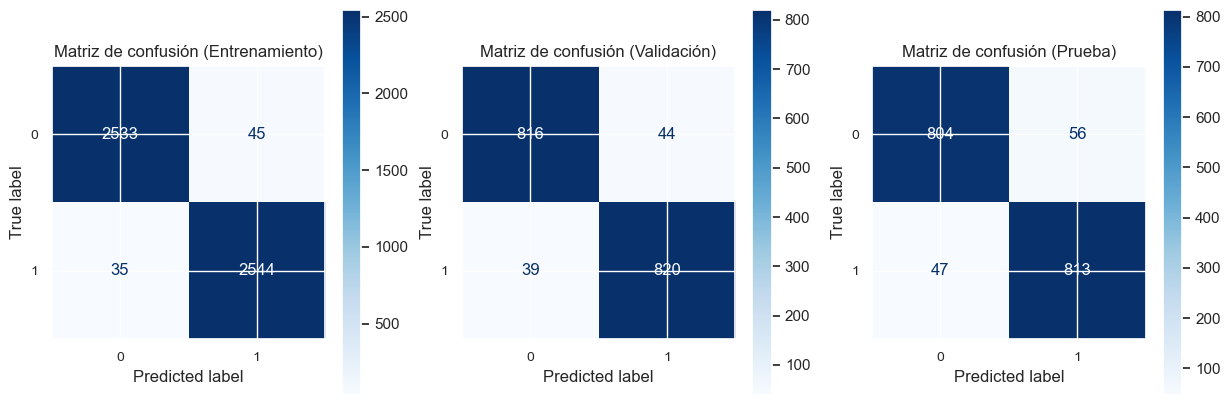

Set de entrenamiento:
Accuracy: 0.984487104905953
Precision: 0.9826187717265353
Recall: 0.9864288483908492
Especificidad: 0.982544608223429
F1-score: 0.9845201238390093
AUC-ROC: 0.998629047468498

Set de validación:
Accuracy: 0.951716114019779
Precision: 0.9490740740740741
Recall: 0.9545983701979045
Especificidad: 0.9488372093023256
F1-score: 0.9518282066163668
AUC-ROC: 0.9882719224625713

Set de prueba:
Accuracy: 0.9401162790697675
Precision: 0.9355581127733027
Recall: 0.9453488372093023
Especificidad: 0.9348837209302325
F1-score: 0.9404279930595719
AUC-ROC: 0.9859802595997836


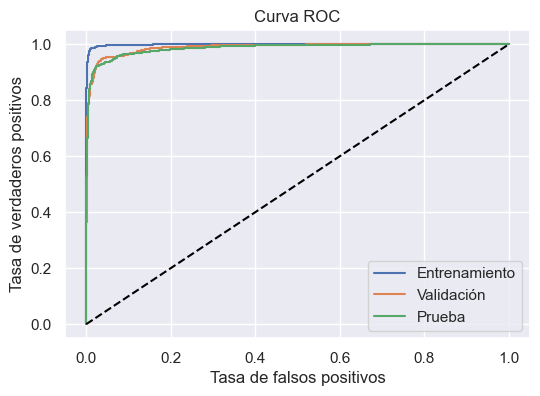

In [54]:
#Modelo 2 Gradient Boosting Classifier con SMOTE

#Set de entrenamiento
y_train_pred2 = GB_SM.predict(X_train)
conf_mat_train2 = confusion_matrix(y_train, y_train_pred2)
acc_train2 = accuracy_score(y_train, y_train_pred2)
prec_train2 = precision_score(y_train, y_train_pred2)
rec_train2 = recall_score(y_train, y_train_pred2)
f1_train2 = f1_score(y_train, y_train_pred2)
auc_train2 = roc_auc_score(y_train, GB_SM.predict_proba(X_train)[:, 1])
fpr_train2, tpr_train2, thresholds_train2 = roc_curve(y_train, GB_SM.predict_proba(X_train)[:, 1])

#Set de validación
y_val_pred2 = GB_SM.predict(X_val)
conf_mat_val2 = confusion_matrix(y_val, y_val_pred2)
acc_val2 = accuracy_score(y_val, y_val_pred2)
prec_val2 = precision_score(y_val, y_val_pred2)
rec_val2 = recall_score(y_val, y_val_pred2)
f1_val2 = f1_score(y_val, y_val_pred2)
auc_val2 = roc_auc_score(y_val, GB_SM.predict_proba(X_val)[:, 1])
fpr_val2, tpr_val2, thresholds_val2 = roc_curve(y_val, GB_SM.predict_proba(X_val)[:, 1])

#Set de prueba
y_test_pred2 = GB_SM.predict(X_test)
conf_mat_test2 = confusion_matrix(y_test, y_test_pred2)
acc_test2 = accuracy_score(y_test, y_test_pred2)
prec_test2 = precision_score(y_test, y_test_pred2)
rec_test2 = recall_score(y_test, y_test_pred2)
f1_test2 = f1_score(y_test, y_test_pred2)
auc_test2 = roc_auc_score(y_test, GB_SM.predict_proba(X_test)[:, 1])
fpr_test2, tpr_test2, thresholds_test2 = roc_curve(y_test, GB_SM.predict_proba(X_test)[:, 1])

#Crear los objetos plot_confusion_matrix
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_confusion_matrix(GB_SM, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0]) #ax[0] es para ubicar el gráfico en la primera posición
plot_confusion_matrix(GB_SM, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1]) #ax[1] es para ubicar el gráfico en la segunda posición
plot_confusion_matrix(GB_SM, X_test, y_test, cmap=plt.cm.Blues, ax=ax[2]) #ax[2] es para ubicar el gráfico en la tercera posición

# Personalizar los parámetros del gráfico
for i, label in enumerate(['Entrenamiento', 'Validación', 'Prueba']):
    ax[i].set_title(f'Matriz de confusión ({label})')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].tick_params(axis='both', which='major', labelsize=10)

# Mostrar el gráfico
plt.show()


espec_train2 = conf_mat_train2[0, 0] / (conf_mat_train2[0, 0] + conf_mat_train2[0, 1])
espec_val2 = conf_mat_val2[0, 0] / (conf_mat_val2[0, 0] + conf_mat_val2[0, 1])
espec_test2 = conf_mat_test2[0, 0] / (conf_mat_test2[0, 0] + conf_mat_test2[0, 1])

print("Set de entrenamiento:")
print("Accuracy:", acc_train2)
print("Precision:", prec_train2)
print("Recall:", rec_train2)
print("Especificidad:", espec_train2)
print("F1-score:", f1_train2)
print("AUC-ROC:", auc_train2)

print()

print("Set de validación:") 
print("Accuracy:", acc_val2)
print("Precision:", prec_val2)
print("Recall:", rec_val2)
print("Especificidad:", espec_val2)
print("F1-score:", f1_val2)
print("AUC-ROC:", auc_val2)

print()

print("Set de prueba:")
print("Accuracy:", acc_test2)
print("Precision:", prec_test2)
print("Recall:", rec_test2)
print("Especificidad:", espec_test2)
print("F1-score:", f1_test2)
print("AUC-ROC:", auc_test2)


# Gráfico de la curva ROC
plt.plot(fpr_train2, tpr_train2, label='Entrenamiento')
plt.plot(fpr_val2, tpr_val2, label='Validación')
plt.plot(fpr_test2, tpr_test2, label='Prueba')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Modelo 3 XGBClassifier con algoritmo de Optimización de Hiperparámetros en base a TPOT y SMOTE

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



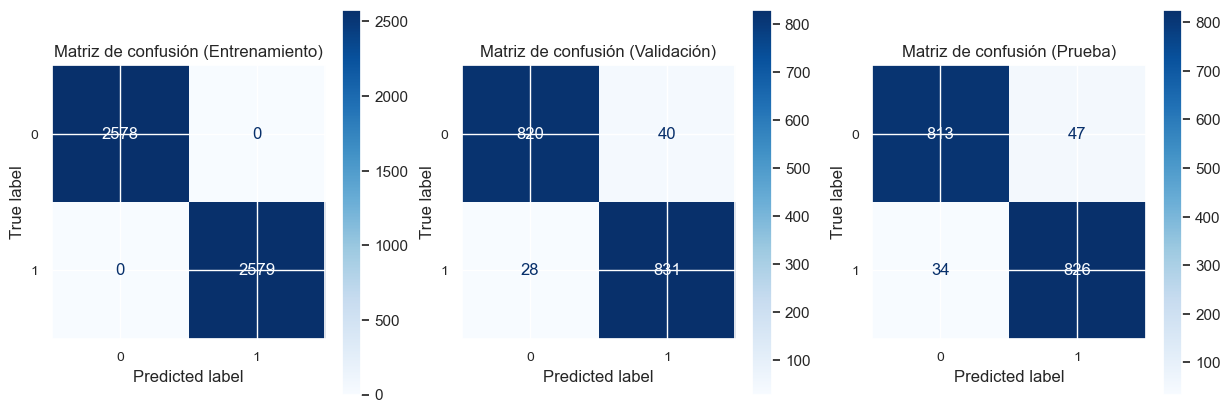

Set de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1-score: 1.0
AUC-ROC: 1.0

Set de validación:
Accuracy: 0.9604421175101804
Precision: 0.9540757749712974
Recall: 0.9674039580908033
Especificidad: 0.9534883720930233
F1-score: 0.9606936416184971
AUC-ROC: 0.9936811327395295

Set de prueba:
Accuracy: 0.952906976744186
Precision: 0.9461626575028637
Recall: 0.9604651162790697
Especificidad: 0.9453488372093023
F1-score: 0.9532602423542987
AUC-ROC: 0.991530557057869


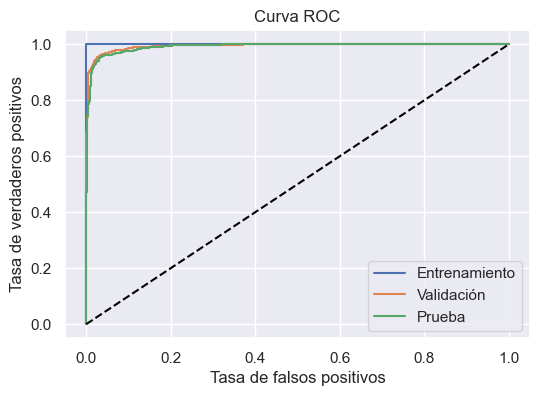

In [55]:
# Modelo 3 XGBClassifier con algoritmo de Optimización de Hiperparámetros en base a TPOT y SMOTE

#Set de entrenamiento
y_train_pred3 = model_xgb.predict(X_train)
conf_mat_train3 = confusion_matrix(y_train, y_train_pred3)
acc_train3 = accuracy_score(y_train, y_train_pred3)
prec_train3 = precision_score(y_train, y_train_pred3)
rec_train3 = recall_score(y_train, y_train_pred3)
f1_train3 = f1_score(y_train, y_train_pred3)
auc_train3 = roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])
fpr_train3, tpr_train3, thresholds_train3 = roc_curve(y_train, model_xgb.predict_proba(X_train)[:, 1])

#Set de validación
y_val_pred3 = model_xgb.predict(X_val)
conf_mat_val3 = confusion_matrix(y_val, y_val_pred3)
acc_val3 = accuracy_score(y_val, y_val_pred3)
prec_val3 = precision_score(y_val, y_val_pred3)
rec_val3 = recall_score(y_val, y_val_pred3)
f1_val3 = f1_score(y_val, y_val_pred3)
auc_val3 = roc_auc_score(y_val, model_xgb.predict_proba(X_val)[:, 1])
fpr_val3, tpr_val3, thresholds_val3 = roc_curve(y_val, model_xgb.predict_proba(X_val)[:, 1])

#Set de prueba
y_test_pred3 = model_xgb.predict(X_test)
conf_mat_test3 = confusion_matrix(y_test, y_test_pred3)
acc_test3 = accuracy_score(y_test, y_test_pred3)
prec_test3 = precision_score(y_test, y_test_pred3)
rec_test3 = recall_score(y_test, y_test_pred3)
f1_test3 = f1_score(y_test, y_test_pred3)
auc_test3 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
fpr_test3, tpr_test3, thresholds_test3 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1])

#Crear los objetos plot_confusion_matrix
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_confusion_matrix(model_xgb, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0]) #ax[0] es para ubicar el gráfico en la primera posición
plot_confusion_matrix(model_xgb, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1]) #ax[1] es para ubicar el gráfico en la segunda posición
plot_confusion_matrix(model_xgb, X_test, y_test, cmap=plt.cm.Blues, ax=ax[2]) #ax[2] es para ubicar el gráfico en la tercera posición

# Personalizar los parámetros del gráfico
for i, label in enumerate(['Entrenamiento', 'Validación', 'Prueba']):
    ax[i].set_title(f'Matriz de confusión ({label})')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].tick_params(axis='both', which='major', labelsize=10)

# Mostrar el gráfico
plt.show()


espec_train3 = conf_mat_train3[0, 0] / (conf_mat_train3[0, 0] + conf_mat_train3[0, 1])
espec_val3 = conf_mat_val3[0, 0] / (conf_mat_val3[0, 0] + conf_mat_val3[0, 1])
espec_test3 = conf_mat_test3[0, 0] / (conf_mat_test3[0, 0] + conf_mat_test3[0, 1])

print("Set de entrenamiento:")
print("Accuracy:", acc_train3)
print("Precision:", prec_train3)
print("Recall:", rec_train3)
print("Especificidad:", espec_train3)
print("F1-score:", f1_train3)
print("AUC-ROC:", auc_train3)

print()

print("Set de validación:") 
print("Accuracy:", acc_val3)
print("Precision:", prec_val3)
print("Recall:", rec_val3)
print("Especificidad:", espec_val3)
print("F1-score:", f1_val3)
print("AUC-ROC:", auc_val3)

print()

print("Set de prueba:")
print("Accuracy:", acc_test3)
print("Precision:", prec_test3)
print("Recall:", rec_test3)
print("Especificidad:", espec_test3)
print("F1-score:", f1_test3)
print("AUC-ROC:", auc_test3)


# Gráfico de la curva ROC
plt.plot(fpr_train3, tpr_train3, label='Entrenamiento')
plt.plot(fpr_val3, tpr_val3, label='Validación')
plt.plot(fpr_test3, tpr_test3, label='Prueba')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()



### Modelo 4 RandomForest con algoritmo de Optimización de Hiperparámetros en base a TPOT y SMOTE

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\martu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



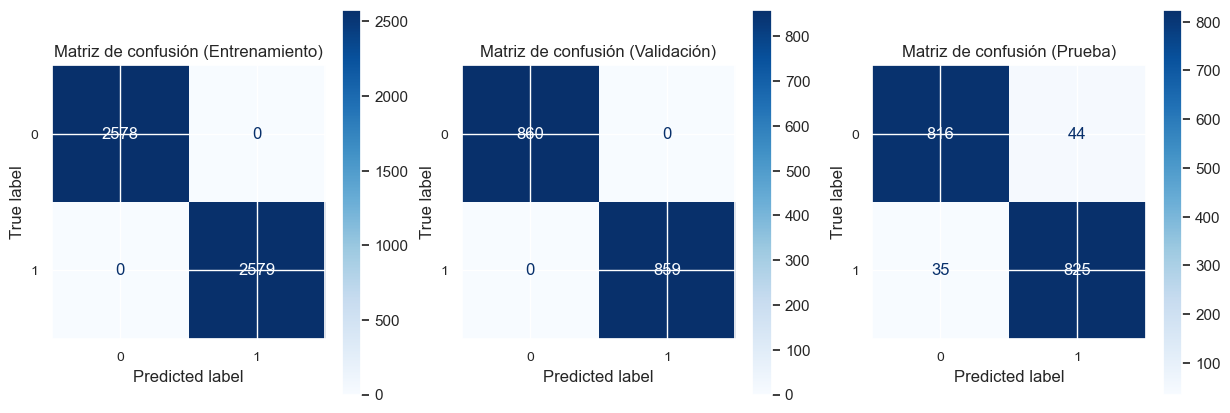

Set de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1-score: 1.0
AUC-ROC: 1.0

Set de validación:
Accuracy: 0.9639325189063409
Precision: 0.9639115250291036
Recall: 0.9639115250291036
Especificidad: 0.963953488372093
F1-score: 0.9639115250291036
AUC-ROC: 0.9937792728158756

Set de prueba:
Accuracy: 0.9540697674418605
Precision: 0.9493670886075949
Recall: 0.9593023255813954
Especificidad: 0.9488372093023256
F1-score: 0.954308849045691
AUC-ROC: 0.9918097620335317


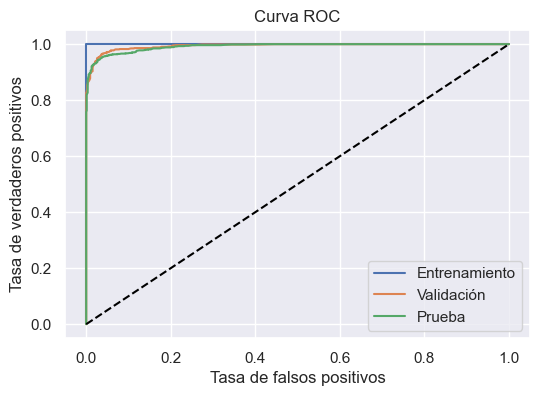

In [65]:
# Modelo 4 Random Forest
#Set de entrenamiento
y_train_pred4 = model_rfc.predict(X_train_rfc)
conf_mat_train4 = confusion_matrix(y_train_rfc, y_train_pred4)
acc_train4 = accuracy_score(y_train_rfc, y_train_pred4)
prec_train4 = precision_score(y_train_rfc, y_train_pred4)
rec_train4 = recall_score(y_train_rfc, y_train_pred4)
f1_train4 = f1_score(y_train_rfc, y_train_pred4)
auc_train4 = roc_auc_score(y_train_rfc, model_rfc.predict_proba(X_train_rfc)[:, 1])
fpr_train4, tpr_train4, thresholds_train4 = roc_curve(y_train_rfc, model_rfc.predict_proba(X_train_rfc)[:, 1])

#Set de validación
y_val_pred4 = model_rfc.predict(X_val_rfc)
conf_mat_val4 = confusion_matrix(y_val_rfc, y_val_pred4)
acc_val4 = accuracy_score(y_val_rfc, y_val_pred4)
prec_val4 = precision_score(y_val_rfc, y_val_pred4)
rec_val4 = recall_score(y_val_rfc, y_val_pred4)
f1_val4 = f1_score(y_val_rfc, y_val_pred4)
auc_val4 = roc_auc_score(y_val_rfc, model_rfc.predict_proba(X_val_rfc)[:, 1])
fpr_val4, tpr_val4, thresholds_val4 = roc_curve(y_val_rfc, model_rfc.predict_proba(X_val_rfc)[:, 1])

#Set de prueba
y_test_pred4 = model_rfc.predict(X_test_rfc)
conf_mat_test4 = confusion_matrix(y_test_rfc, y_test_pred4)
acc_test4 = accuracy_score(y_test_rfc, y_test_pred4)
prec_test4 = precision_score(y_test_rfc, y_test_pred4)
rec_test4 = recall_score(y_test_rfc, y_test_pred4)
f1_test4 = f1_score(y_test_rfc, y_test_pred4)
auc_test4 = roc_auc_score(y_test_rfc, model_rfc.predict_proba(X_test_rfc)[:, 1])
fpr_test4, tpr_test4, thresholds_test4 = roc_curve(y_test_rfc, model_rfc.predict_proba(X_test_rfc)[:, 1])


#Crear los objetos plot_confusion_matrix
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_confusion_matrix(model_rfc, X_train_rfc, y_train_rfc, cmap=plt.cm.Blues, ax=ax[0]) #ax[0] es para ubicar el gráfico en la primera posición
plot_confusion_matrix(model_rfc, X_val_rfc, y_val_rfc_pred, cmap=plt.cm.Blues, ax=ax[1]) #ax[1] es para ubicar el gráfico en la segunda posición
plot_confusion_matrix(model_rfc, X_test_rfc, y_test_rfc, cmap=plt.cm.Blues, ax=ax[2]) #ax[2] es para ubicar el gráfico en la tercera posición





# Personalizar los parámetros del gráfico
for i, label in enumerate(['Entrenamiento', 'Validación', 'Prueba']):
    ax[i].set_title(f'Matriz de confusión ({label})')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].tick_params(axis='both', which='major', labelsize=10)

# Mostrar el gráfico
plt.show()


espec_train4 = conf_mat_train4[0, 0] / (conf_mat_train4[0, 0] + conf_mat_train4[0, 1])
espec_val4 = conf_mat_val4[0, 0] / (conf_mat_val4[0, 0] + conf_mat_val4[0, 1])
espec_test4 = conf_mat_test4[0, 0] / (conf_mat_test4[0, 0] + conf_mat_test4[0, 1])





print("Set de entrenamiento:")
print("Accuracy:", acc_train4)
print("Precision:", prec_train4)
print("Recall:", rec_train4)
print("Especificidad:", espec_train4)
print("F1-score:", f1_train4)
print("AUC-ROC:", auc_train4)

print()

print("Set de validación:") 
print("Accuracy:", acc_val4)
print("Precision:", prec_val4)
print("Recall:", rec_val4)
print("Especificidad:", espec_val4)
print("F1-score:", f1_val4)
print("AUC-ROC:", auc_val4)

print()

print("Set de prueba:")
print("Accuracy:", acc_test4)
print("Precision:", prec_test4)
print("Recall:", rec_test4)
print("Especificidad:", espec_test4)
print("F1-score:", f1_test4)
print("AUC-ROC:", auc_test4)


# Gráfico de la curva ROC
plt.plot(fpr_train4, tpr_train4, label='Entrenamiento')
plt.plot(fpr_val4, tpr_val4, label='Validación')
plt.plot(fpr_test4, tpr_test4, label='Prueba')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()







# 6.4 Variables predictivas más importantes

In [66]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Definir las variables independientes (X) y la variable dependiente (y)
X_rfr = df.drop('Stroke_1', axis=1)
y_rfr = df['Stroke_1']

# Escalar las características
scaler_rfr = MinMaxScaler()
X_scaled_rfr = scaler_rfr.fit_transform(X_rfr)

# Dividir los datos en un conjunto de entrenamiento y prueba (80% y 20%)
X_train_test_rfr, X_test_rfr, y_train_test_rfr, y_test_rfr = train_test_split(X_rfr, y_rfr, test_size=0.2, random_state=42, stratify=y_rfr)

# Dividir el conjunto de entrenamiento y prueba en un conjunto de entrenamiento y validación (60% y 20%)
X_train_rfr, X_val_rfr, y_train_rfr, y_val_rfr = train_test_split(X_train_test_rfr, y_train_test_rfr, test_size=0.25, random_state=42, stratify=y_train_test_rfr)

# Crear el modelo de RandomForestClassifier con los hiperparámetros encontrados por TPOT
model_rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_features=0.7500000000000001, min_samples_leaf=18, min_samples_split=20, n_estimators=100)

# Entrenar el modelo con los datos de entrenamiento
model_rfr.fit(X_train_rfr, y_train_rfr)


# Obtener importancia de variables
importancia_variables = pd.Series(model_rfr.feature_importances_, index=X.columns).sort_values(ascending=False)

# Seleccionar las 5 variables predictoras más importantes
variables_seleccionadas = importancia_variables[:5].index.tolist()

print("Variables predictoras seleccionadas:", variables_seleccionadas)

c:\Users\martu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Variables predictoras seleccionadas: ['Avg_glucose_level', 'Age', 'Bmi', 'Smoking_never smoked', 'Residence_Urban']


# FUENTES DE LOS CODIGOS

TPOT: la documentación oficial de TPOT https://epistasislab.github.io/tpot/ y el repositorio de GitHub https://github.com/EpistasisLab/tpot
RandomizedSearchCV: la documentación oficial de Scikit-Learn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.
RandomizedSearchCV.html y el repositorio de GitHub https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/model_selection

GridSearchCV: la documentación oficial de Scikit-Learn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html y el repositorio de GitHub https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/model_selection

SMOTE: la documentación oficial de Imbalanced-Learn https://imbalanced-learn.org/stable/over_sampling.html#smote-variants y el repositorio de GitHub https://github.com/scikit-learn-contrib/imbalanced-learn/tree/master/imblearn/over_sampling

ExtraTreesClassifier: la documentación oficial de Scikit-Learn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html y el repositorio de GitHub https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/ensemble


Pandas profiling: https://github.com/ydataai/ydata-profiling

SMOTE: https://github.com/analyticalmindsltd/smote_variants

ADASYN: https://github.com/stavskal/ADASYN

ROC Y AUC: https://github.com/topics/auc-roc-curve

TPOT: https://github.com/telekom-security/tpotce

Extra Trees Classifier: https://github.com/topics/extra-trees-classifier

Gradient Boost Classifier: https://github.com/topics/gradient-boosting-classifier


 https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

 https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

 https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-regression-python/

 https://www.datacamp.com/community/tutorials/understanding-auc-roc-curve-python

  https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-models/

  https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/


  